In [11]:
import numpy as np
from sklearn import cluster, datasets
from scipy.misc import face
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
#Load face from scipy.misc
face=face(gray=True)


In [13]:
#Apply K-means clustoring
n_clusters=5
np.random.seed(0)
X= face.reshape(-1,1)
k_means=cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
values=k_means.cluster_centers_.squeeze()
labels=k_means.labels_
print(values)
print(labels)

[111.62805703  27.11166441 192.8878986   73.35388722 150.24313581]
[0 0 4 ... 4 4 4]


In [15]:
#create an array from labels and values
face_compressed=np.choose(labels,values)
face_compressed.shape=face.shape
vmin=face.min()
vmax=face.max()
print(vmin)
print(vmax)

0
250


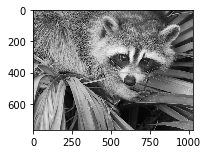

In [25]:
#orginalface
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

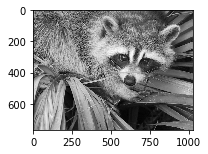

In [26]:
#compressed Image
plt.figure(2, figsize=(3,2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin,vmax=vmax)

In [18]:
#Load compressed and original
original=face
compressed=face_compressed

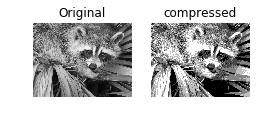

In [27]:
#initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("compressed", compressed)

#loop over images
for (i,(name,image)) in enumerate(images):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
